In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# !pip install arch

  Obtaining dependency information for arch from https://files.pythonhosted.org/packages/24/b4/41ffe91f46eb3f49bf022c66f8768f469617329718d4246953ad3853c073/arch-6.3.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/924.1 kB ? eta -:--:--
   ---------------------------------------- 10.2/924.1 kB ? eta -:--:--
   - ------------------------------------- 41.0/924.1 kB 653.6 kB/s eta 0:00:02
   ------ --------------------------------- 143.4/924.1 kB 1.4 MB/s eta 0:00:01
   ----------- ---------------------------- 276.5/924.1 kB 1.9 MB/s eta 0:00:01
   ----------------------- ---------------- 532.5/924.1 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------  921.6/924.1 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 924.1/924.1 kB 3.7 MB/s eta 0:00:00


Рассмотрим данные об общей численности населения (**population size**), чистой миграции (**net migration**) и общий коэффициент рождаемости (**fertility rate**) по годам в РФ.

In [4]:
data = pd.read_csv('data.csv', delimiter=';')
data

year  population size  net migration  fertility rate
0   1960.0      119897000.0      -161432.0            2.52
1   1961.0      121236000.0      -143868.0            2.45
2   1962.0      122591000.0      -195932.0            2.36
3   1963.0      123960000.0      -184852.0            2.27
4   1964.0      125345000.0      -165355.0            2.18
..     ...              ...            ...             ...
57  2017.0      144496739.0       350105.0            1.62
58  2018.0      144477859.0       336527.0            1.58
59  2019.0      144406261.0       333509.0            1.50
60  2020.0      144073139.0       340711.0            1.51
61  2021.0      144130482.0       320617.0            1.49

[62 rows x 4 columns]

**Построим графики выбранных показателей.**

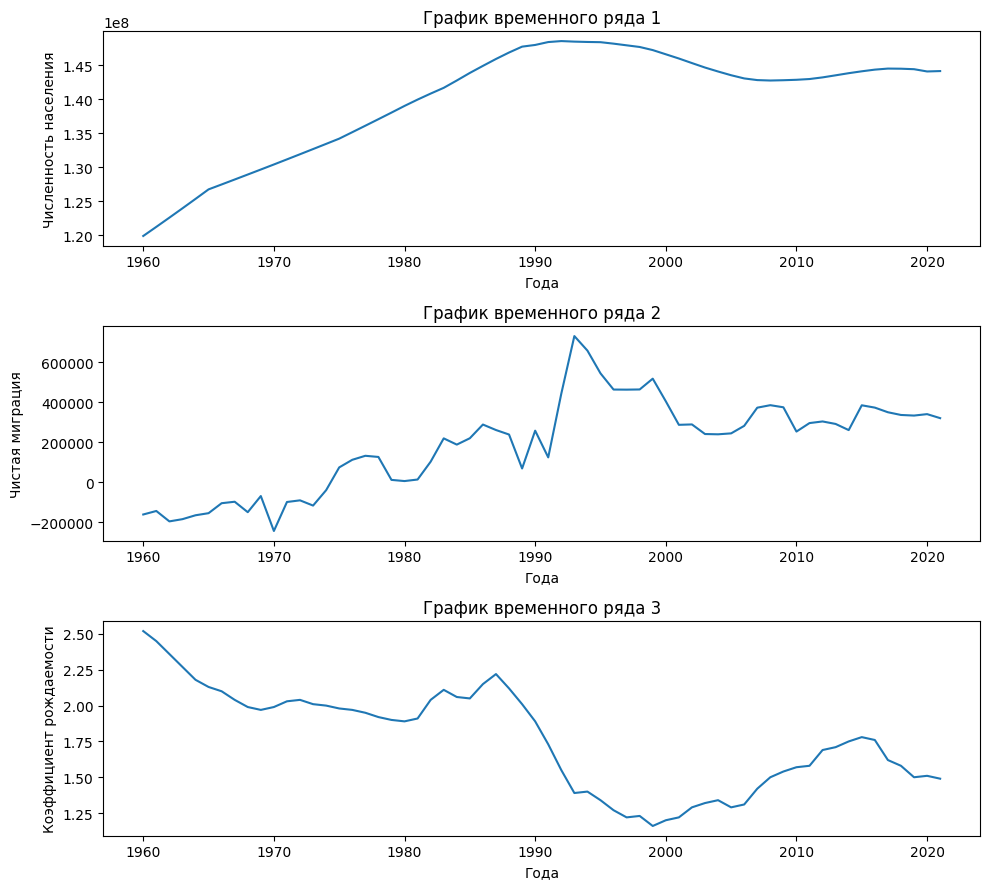

In [5]:
plt.figure(figsize=(10, 9))

plt.subplot(3, 1, 1)
plt.plot(data['year'], data['population size'])
plt.title('График временного ряда 1')
plt.xlabel('Года')
plt.ylabel('Численность населения')

plt.subplot(3, 1, 2)
plt.plot(data['year'], data['net migration'])
plt.title('График временного ряда 2')
plt.xlabel('Года')
plt.ylabel('Чистая миграция')

plt.subplot(3, 1, 3)
plt.plot(data['year'], data['fertility rate'])
plt.title('График временного ряда 3')
plt.xlabel('Года')
plt.ylabel('Коэффициент рождаемости')

plt.tight_layout()
plt.show()

Первый график показывает явное присутствие положительного тренда, с большой вероятностью первый временной ряд не стационарен. По двум другим графикам сложно определить стационарность ряда, необходимы строкие тесты, однако, на первый взгляд кажется, что и они не стационарны.

# Тесты единичного корня

**Проведем тесты единичного корня для ряда "Численность населения":**

In [6]:
from arch.unitroot import PhillipsPerron
from arch.unitroot import ADF
from arch.unitroot import KPSS

In [32]:
def unit_root_tests(data):
    results = {}
    print("Проведение ADF теста без тренда:")
    adf_test = ADF(data, trend='n')
    print(f'ADF Statistic: {adf_test.stat}')
    print(f'p-value: {adf_test.pvalue}')
    results['ADF'] = [adf_test.null_hypothesis, adf_test.stat, adf_test.pvalue]

    print("\nПроведение ADF теста с трендом:")
    adf_test = ADF(data, trend='ct')
    print(f'ADF Statistic: {adf_test.stat}')
    print(f'p-value: {adf_test.pvalue}')
    results['trend_ADF'] = [adf_test.null_hypothesis, adf_test.stat, adf_test.pvalue]
    
    print("\nПроведение PP теста без тренда:")
    pp_test = PhillipsPerron(data, trend='n')
    print(f'PP Statistic: {pp_test.stat}')
    print(f'p-value: {pp_test.pvalue}')
    results['PP'] = [pp_test.null_hypothesis, pp_test.stat, pp_test.pvalue]

    print("\nПроведение PP теста с трендом:")
    pp_test = PhillipsPerron(data, trend='ct')
    print(f'PP Statistic: {pp_test.stat}')
    print(f'p-value: {pp_test.pvalue}')
    results['trend_PP'] = [pp_test.null_hypothesis, pp_test.stat, pp_test.pvalue]
    
    print("\nПроведение KPSS теста без тренда:")
    kpss_test = KPSS(data, trend='c')
    print(f'KPSS Statistic: {kpss_test.stat}')
    print(f'p-value: {kpss_test.pvalue}')
    results['KPSS'] = [kpss_test.null_hypothesis, kpss_test.stat, kpss_test.pvalue]

    print("\nПроведение KPSS теста с трендом:")
    kpss_test = KPSS(data, trend='ct')
    print(f'KPSS Statistic: {kpss_test.stat}')
    print(f'p-value: {kpss_test.pvalue}')
    results['trend_KPSS'] = [kpss_test.null_hypothesis, kpss_test.stat, kpss_test.pvalue]

    return results
    

In [33]:
results_1 = unit_root_tests(data['population size'])

Проведение ADF теста без тренда:
ADF Statistic: 0.3462997567551178
p-value: 0.7871778978001315

Проведение ADF теста с трендом:
ADF Statistic: -2.087290074330158
p-value: 0.553206338654023

Проведение PP теста без тренда:
PP Statistic: 1.5282825752973548
p-value: 0.9688443024372158

Проведение PP теста с трендом:
PP Statistic: -1.4913869332868273
p-value: 0.8320622785230145

Проведение KPSS теста без тренда:
KPSS Statistic: 0.8062766112551766
p-value: 0.007042114763161458

Проведение KPSS теста с трендом:
KPSS Statistic: 0.2815178425989001
p-value: 0.0024801166162756686


Рассмотрим результаты различных тестов на единичный корень для временного ряда "Численность населения":
1. Согласно расширенным тестам Дики-Фуллера (ADF) с трендом и без тренда, мы **не можем отвергнуть нулевую гитотезу** о наличии единиченого корня, что означает что данный временной ряд **не стационарен**, (p-value > 0.05)

2. Согласно тестам Филлипса-Перрона (PP) с трендом и без тренда, мы **не можем отвергнуть нулевую гитотезу** о наличии единиченого корня, что означает что данный временной ряд **не стационарен**, (p-value > 0.05)

3. Согласно KPSS тестам с трендом и без тренда, мы **отвергаем нулевую гитотезу** о стационарности, что означает что данный временной ряд **не стационарен**, (p-value < 0.05)


Вывод: по результатам всех проведенных тестов временной ряд "Численность населения" **не стационарен**

**Проведем тесты единичного корня для ряда "Чистая миграция":**

In [34]:
results_2 = unit_root_tests(data['net migration'])

Проведение ADF теста без тренда:
ADF Statistic: -1.0115613250959516
p-value: 0.28348137915688226

Проведение ADF теста с трендом:
ADF Statistic: -2.351855122294153
p-value: 0.4055070135188368

Проведение PP теста без тренда:
PP Statistic: -0.8247458822178559
p-value: 0.36014732394384985

Проведение PP теста с трендом:
PP Statistic: -2.3115376965997796
p-value: 0.4275789025184642

Проведение KPSS теста без тренда:
KPSS Statistic: 0.9833968889552483
p-value: 0.002712424914044629

Проведение KPSS теста с трендом:
KPSS Statistic: 0.2352447775506505
p-value: 0.00674713368831152


Рассмотрим результаты различных тестов на единичный корень для временного ряда "Чистая миграция":
1. Согласно расширенным тестам Дики-Фуллера (ADF) с трендом и без тренда, мы **не можем отвергнуть нулевую гитотезу** о наличии единиченого корня, что означает что данный временной ряд **не стационарен**, (p-value > 0.05)

2. Согласно тестам Филлипса-Перрона (PP) с трендом и без тренда, мы **не можем отвергнуть нулевую гитотезу** о наличии единиченого корня, что означает что данный временной ряд **не стационарен**, (p-value > 0.05)

3. Согласно KPSS тестам с трендом и без тренда, мы **отвергаем нулевую гитотезу** о стационарности, что означает что данный временной ряд **не стационарен**, (p-value < 0.05)


Вывод: по результатам всех проведенных тестов временной ряд "Чистая миграция" **не стационарен**

**Проведем тесты единичного корня для ряда "Общий коэффициент рождаемости":**

In [35]:
results_3 = unit_root_tests(data['fertility rate'])

Проведение ADF теста без тренда:
ADF Statistic: -1.1911185373645035
p-value: 0.2136377730921497

Проведение ADF теста с трендом:
ADF Statistic: -2.961597324612924
p-value: 0.14313589805477828

Проведение PP теста без тренда:
PP Statistic: -1.5268942051081587
p-value: 0.11903425958751551

Проведение PP теста с трендом:
PP Statistic: -2.0083025465615036
p-value: 0.5969037656854186

Проведение KPSS теста без тренда:
KPSS Statistic: 0.8844551994183081
p-value: 0.004603066353358523

Проведение KPSS теста с трендом:
KPSS Statistic: 0.14316129260147703
p-value: 0.05602598249794857


Рассмотрим результаты различных тестов на единичный корень для временного ряда "Общий коэффициент рождаемости":
1. Согласно расширенным тестам Дики-Фуллера (ADF) с трендом и без тренда, мы **не можем отвергнуть нулевую гитотезу** о наличии единиченого корня, что означает что данный временной ряд **не стационарен**, (p-value > 0.05)

2. Согласно тестам Филлипса-Перрона (PP) с трендом и без тренда, мы **не можем отвергнуть нулевую гитотезу** о наличии единиченого корня, что означает что данный временной ряд **не стационарен**, (p-value > 0.05)

3. Согласно KPSS тесту без тренда, мы **отвергаем нулевую гитотезу** о стационарности, что означает что данный временной ряд **не стационарен**, (p-value < 0.05)

4. Согласно KPSS тесту с трендом, мы **не можем отвергнуть нулевую гитотезу** о стационарности, что означает что данный временной ряд **стационарен**, (p-value > 0.05)


Вывод: Временной ряд "Общий коэффициент рождаемости" скорее всего **не стационарен**

**Рассчитаем значения временного ряда цепного прироста для общего коэффициента рождаемости и проведём для него тесты единиченого корня:**

In [36]:
delta_y = pd.DataFrame(columns=['delta_fertility'])
for i in np.array(data.index)[1:]:
    delta_y.loc[ len(delta_y.index )] = data['fertility rate'][i] - data['fertility rate'][i-1]
results_delta_3 = unit_root_tests(delta_y['delta_fertility'])

Проведение ADF теста без тренда:
ADF Statistic: -3.81447764632228
p-value: 0.00015055926669119252

Проведение ADF теста с трендом:
ADF Statistic: -3.906965472794124
p-value: 0.011867946709324282

Проведение PP теста без тренда:
PP Statistic: -3.6748552451396126
p-value: 0.0002549589753871339

Проведение PP теста с трендом:
PP Statistic: -3.7372279084090425
p-value: 0.02001978984654628

Проведение KPSS теста без тренда:
KPSS Statistic: 0.15761657084472763
p-value: 0.3677566735034955

Проведение KPSS теста с трендом:
KPSS Statistic: 0.06800161275429577
p-value: 0.3654608309114689


Рассмотрим результаты различных тестов на единичный корень для временного ряда цепного прироста ряда "Общий коэффициент рождаемости":
1. Согласно расширенным тестам Дики-Фуллера (ADF) с трендом и без тренда, мы **отвергаем нулевую гитотезу** о наличии единиченого корня, что означает что данный временной ряд **стационарен**, (p-value > 0.05)

2. Согласно тестам Филлипса-Перрона (PP) с трендом и без тренда, мы **отвергаем нулевую гитотезу** о наличии единиченого корня, что означает что данный временной ряд **стационарен**, (p-value > 0.05)

3. Согласно KPSS тестам с трендом и без тренда, мы **не можем отвергнуть нулевую гитотезу** о стационарности, что означает что данный временной ряд **не стационарен**, (p-value > 0.05)

Вывод: Временной ряд цепного прироста ряда "Общий коэффициент рождаемости" скорее всего **стационарен**

**Построим график временного ряда цепного прироста для общего коэффициента рождаемости**

Text(0, 0.5, 'Цепной прирост коэффициента рождаемости')

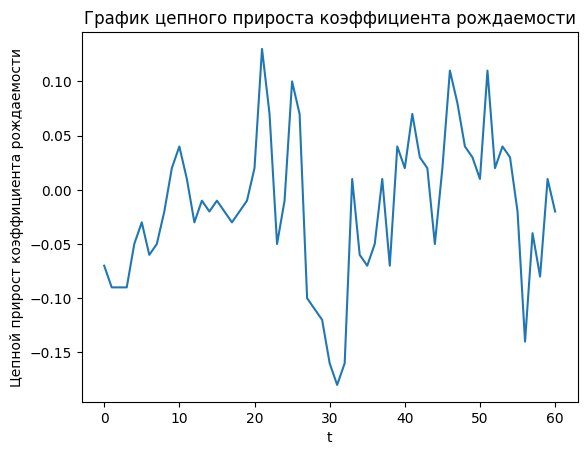

In [12]:
plt.plot(delta_y['delta_fertility'])
plt.title('График цепного прироста коэффициента рождаемости')
plt.xlabel('t')
plt.ylabel('Цепной прирост коэффициента рождаемости')

**Выведем результаты тестов единичного корня для общего коэффициента рождаемости и цепного прироста общего коэффициента рождаемости в виде сводной таблицы:**

In [19]:
results_table_y = pd.DataFrame(columns = ['ВР', 'Тест', 'Нулевая гипотеза', 'Статистика критерия', 'p-value', 'Вывод'])
for key in results_3.keys():
    conclusion = ''
    if results_3[key][2] >=0.05:
        conclusion += 'Не можем отвергнуть нулевую гипотезу. '
    else:
        conclusion += 'Отвергаем нулевую гипотезу. '
    results_table_y.loc[len(results_table_y.index)] = ['y', key, results_3[key][0], results_3[key][1], results_3[key][2], conclusion]

for key in results_delta_3.keys():
    conclusion = ''
    if results_delta_3[key][2] >=0.05:
        conclusion += 'Не можем отвергнуть нулевую гипотезу. '
    else:
        conclusion += 'Отвергаем нулевую гипотезу. '
    results_table_y.loc[len(results_table_y.index)] = ['Δy', key, results_delta_3[key][0], results_delta_3[key][1], results_delta_3[key][2], conclusion]
results_table_y  

ВР        Тест                   Нулевая гипотеза  Статистика критерия  \
0    y         ADF  The process contains a unit root.            -1.191119   
1    y   trend_ADF  The process contains a unit root.            -2.961597   
2    y          PP  The process contains a unit root.            -1.526894   
3    y    trend_PP  The process contains a unit root.            -2.008303   
4    y        KPSS  The process is weakly stationary.             0.884455   
5    y  trend_KPSS  The process is weakly stationary.             0.143161   
6   Δy         ADF  The process contains a unit root.            -3.814478   
7   Δy   trend_ADF  The process contains a unit root.            -3.906965   
8   Δy          PP  The process contains a unit root.            -3.674855   
9   Δy    trend_PP  The process contains a unit root.            -3.737228   
10  Δy        KPSS  The process is weakly stationary.             0.157617   
11  Δy  trend_KPSS  The process is weakly stationary.             0.068002   

     p-value                                   Вывод  
0   0.213638  Не можем отвергнуть нулевую гипотезу.   
1   0.143136  Не можем отвергнуть нулевую гипотезу.   
2   0.119034  Не можем отвергнуть нулевую гипотезу.   
3   0.596904  Не можем отвергнуть нулевую гипотезу.   
4   0.004603            Отвергаем нулевую гипотезу.   
5   0.056026  Не можем отвергнуть нулевую гипотезу.   
6   0.000151            Отвергаем нулевую гипотезу.   
7   0.011868            Отвергаем нулевую гипотезу.   
8   0.000255            Отвергаем нулевую гипотезу.   
9   0.020020            Отвергаем нулевую гипотезу.   
10  0.367757  Не можем отвергнуть нулевую гипотезу.   
11  0.365461  Не можем отвергнуть нулевую гипотезу.

Видим, что временной ряд цепного прироста общего коэффициента рождаемости является стационарным рядом, в то время как исходный временной ряд не является таковым.

Так как цепной прирост это разность первого порядка от исходного временного ряда, то можем сделать предположение о степени интегрируемости данного временного ряда равной 1 и ряд имеет разностно-стационарный характер.

**Рассчитаем степени интегрируемости для наших времянных рядов**

In [21]:
def find_order_of_integration(data):
    pv = ADF(data).pvalue
    if pv > 0.05:
        diff_data = data.diff().dropna()
        return 1 + find_order_of_integration(diff_data)
    else:
        return 0

In [29]:
d1 = find_order_of_integration(data['population size'])
d2 = find_order_of_integration(data['net migration'])
d3 = find_order_of_integration(data['fertility rate'])

print(f'Для ВР "Численность населения" степень интегрируемости: {d1}')
print(f'Для ВР "Чистая миграция" степень интегрируемости: {d2}')
print(f'Для ВР "Общий коэффициент рождаемости" степень интегрируемости: {d3}')

Для ВР "Численность населения" степень интегрируемости: 2
Для ВР "Чистая миграция" степень интегрируемости: 1
Для ВР "Общий коэффициент рождаемости" степень интегрируемости: 1


Видим, что гипотеза о степени интегрируемости времянного ряда общего коэффициента рождаемости, равного единице подтвердилась. Также степерь интегрируемости остальных рядов $\ge 1$, что говорит о нестационарности данных времянных рядов.

In [25]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(data):
    pv = ADF(data).pvalue    
    if pv > 0.05:
        print("Ряд не стационарен. Проверяем на тренд-стационарность.")
        pv = ADF(data, trend = 'ct').pvalue
        if pv <= 0.05:
            print("Ряд тренд-стационарен.")
        else:
            print("Ряд не тренд-стационарен. Проверяем на разностно-стационарность.")
            diff_data = data.diff().dropna()
            pv = ADF(diff_data).pvalue
            if pv <= 0.05:
                print("Ряд разностно-стационарен.")
            else:
                print("Ряд не разностно-стационарен.")
    else:
        print("Ряд стационарен.")

**Проверим ряды на тренд-стационарность и разностно-стационарность:**

In [26]:
check_stationarity(data['population size'])

Ряд не стационарен. Проверяем на тренд-стационарность.
Ряд не тренд-стационарен. Проверяем на разностно-стационарность.
Ряд не разностно-стационарен.


In [27]:
check_stationarity(data['net migration'])

Ряд не стационарен. Проверяем на тренд-стационарность.
Ряд не тренд-стационарен. Проверяем на разностно-стационарность.
Ряд разностно-стационарен.


In [28]:
check_stationarity(data['fertility rate'])

Ряд не стационарен. Проверяем на тренд-стационарность.
Ряд не тренд-стационарен. Проверяем на разностно-стационарность.
Ряд разностно-стационарен.


**Проведем тест Zivot-Andrews тест для данных о чистой миграции, поскольку график этого ряда больше всего напоминает график со структурным сдвигом.**

In [129]:
from arch.unitroot import ZivotAndrews

za_test = ZivotAndrews(data['net migration'])
print(za_test.summary())


        Zivot-Andrews Results        
Test Statistic                 -3.923
P-value                         0.398
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.



Нулевая гипотеза (H0): Временной ряд имеет единичный корень с трендом.
Альтернативная гипотеза: Временной ряд является трендово-стационарным процессом с однократным в тренде.
Тест Zivot-Andrews указывает на то, что временной ряд “Чистая миграция” не стационарен.